In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('clean_bmart.csv')
lreg = LinearRegression()
X = train.drop('Item_Outlet_Sales',1)
le=[]
x=X.values
ley=LabelEncoder()
ley.fit(train.Item_Outlet_Sales)
for i in range(X.shape[1]):
    le.append(LabelEncoder())
for i in range(X.shape[1]):
    le[i].fit(X.values[:,i])
    x[:,i]=le[i].transform(X.values[:,i])
train.Item_Outlet_Sales=ley.transform(train.Item_Outlet_Sales)
x_train, x_cv, y_train, y_cv = train_test_split(x,train.Item_Outlet_Sales, test_size =0.3)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_cv)
mse = np.mean((pred - y_cv)**2)
print("mse:",mse)
print("score:",lreg.score(x_cv,y_cv))


mse: 387532.70401155663
score: 0.5441441916008938


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


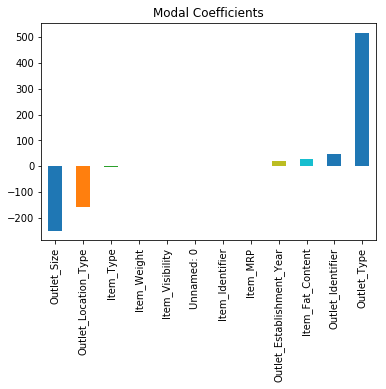

In [3]:
predictors = X.columns
coef = Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')


In [4]:
ridgeReg = Ridge(alpha=5, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

mse = np.mean((pred - y_cv)**2)

print("mse:",mse)
print("score:",ridgeReg.score(x_cv,y_cv))

mse: 703858.4091601627
score: 0.17204937600144699


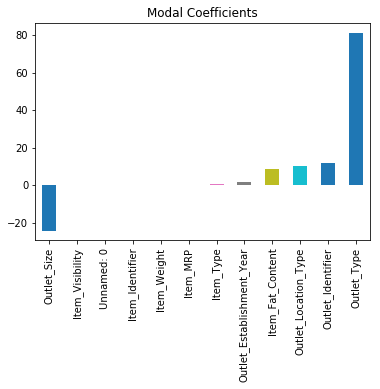

In [5]:
coef = Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [6]:
ridgeReg = Ridge(alpha=10, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

mse = np.mean((pred - y_cv)**2)

print("mse:",mse)
print("score:",ridgeReg.score(x_cv,y_cv))

mse: 766362.4769052359
score: 0.09852566552432263


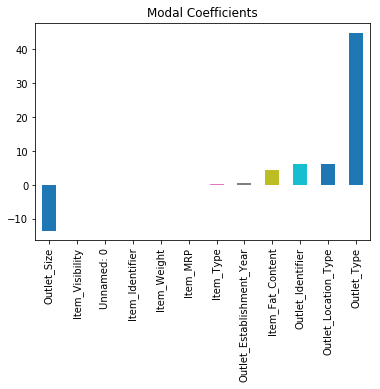

In [7]:
coef = Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

mse: 388753.4850987287
score: 0.5427081833785927


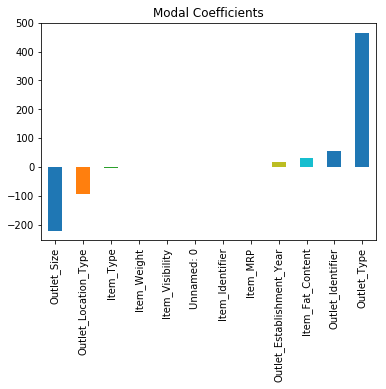

In [8]:
ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

mse = np.mean((pred - y_cv)**2)

print("mse:",mse)
print("score:",ridgeReg.score(x_cv,y_cv))
coef = Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

mse: 387833.19991808286
score: 0.5437907174218835


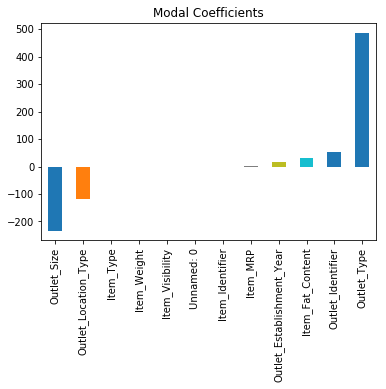

In [9]:
ridgeReg = Ridge(alpha=0.025, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

mse = np.mean((pred - y_cv)**2)

print("mse:",mse)
print("score:",ridgeReg.score(x_cv,y_cv))
coef = Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

mse: 387532.1563133668
score: 0.5441448358598131


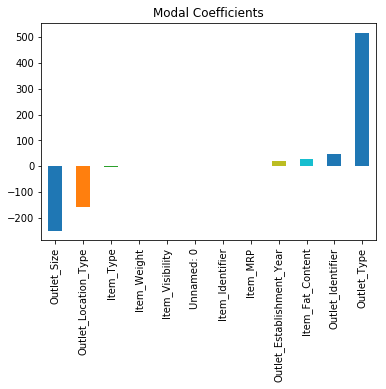

In [10]:
ridgeReg = Ridge(alpha=0.0001, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

mse = np.mean((pred - y_cv)**2)

print("mse:",mse)
print("score:",ridgeReg.score(x_cv,y_cv))
coef = Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')